In [2]:
import numpy as np

- 初始质心点是从数据集中随机选取的
- `data_ = data[(closest_centroids_ids == centroids_index).flatten()]`中间得到的是一个二维数组，如果作为索引，必须要先**展平为一维数组**

In [24]:
class KMeans:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters

    # train 是一个循环过程
    def train(self, max_iter):
        # 随机选择K个中心点
        centroids = KMeans.centroid_init(self.data, self.num_clusters)
        # 每个点都要计算K个距离
        num_examples = data.shape[0]
        closest_centroids_ids = np.empty((num_examples, 1))
        for _ in range(max_iter):
            # 找到最近距离的中心点
            closest_centroids_ids = KMeans.centroids_find_closest(self.data, centroids)
            # 重新找到
            centroids = KMeans.centroids_compute(self.data, closest_centroids_ids, self.num_clusters)
        return closest_centroids_ids, centroids
                
    @staticmethod
    def centroid_init(data, num_clusters):
        num_examples = data.shape[0]
        random_ids = np.random.permutation(num_examples)
        centroids = data[random_ids[:num_clusters], :]
        return centroids

    @staticmethod
    def centroids_find_closest(data, centroids):
        num_examples = data.shape[0]
        num_clusters = centroids.shape[0]
        closest_centroids_ids = np.empty((num_examples, 1))
        for example_index in range(num_examples):
            # 储存每个样本点的K个距离
            distance = np.zeros((num_clusters, 1))
            for centroid_index in range(num_clusters):
                distance_diff = data[example_index] - centroids[centroid_index] # 有没有问题？
                distance[centroid_index] = np.sqrt(np.sum(distance_diff ** 2))
            closest_centroids_ids[example_index] = np.argmin(distance)
        return closest_centroids_ids   

    @staticmethod
    def centroids_compute(data, closest_centroids_ids, num_clusters):
        num_features = data.shape[1]
        centroids = np.zeros((num_clusters, num_features))
        for centroids_index in range(num_clusters):
            data_ = data[(closest_centroids_ids == centroids_index).flatten()]
            centroids[centroids_index] = np.mean(data_, axis=0)            
        return centroids   

### 使用鸢尾花数据集，进行聚类实验

- 注意`plt.legend()`的位置

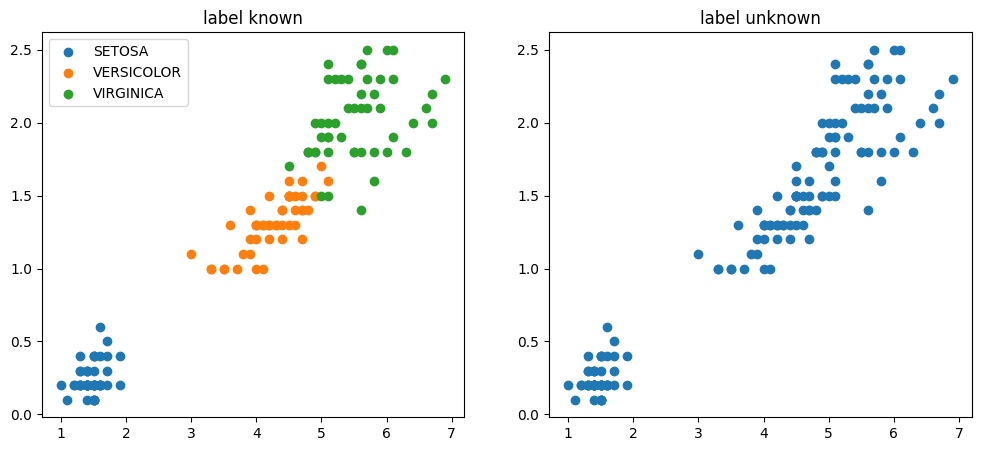

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('.\data\iris.csv')
iris_types = ['SETOSA','VERSICOLOR','VIRGINICA']
x_axis = 'petal_length'
y_axis = 'petal_width'

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class'] == iris_type], data[y_axis][data['class'] == iris_type], label=iris_type)
plt.title('label known')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data[x_axis], data[y_axis])
plt.title('label unknown')


plt.show()

In [29]:
num_examples = data.shape[0]
X_train = data[[x_axis, y_axis]].values  # (150, 2)

num_clusters = 3
max_iter = 50

kmeans = KMeans(X_train, num_cluters)
closest_centroids_ids, centorids = kmeans.train(max_iter)

kmeans:只是分类，未说种类，只需按种类画出图即可

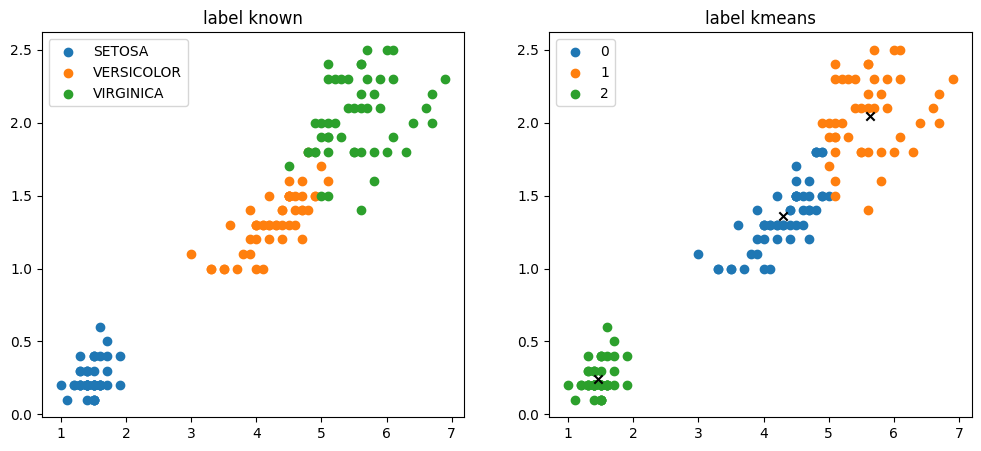

In [32]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class'] == iris_type], data[y_axis][data['class'] == iris_type], label=iris_type)
plt.title('label known')
plt.legend()

plt.subplot(1, 2, 2)
for cluster_index in range(num_clusters):
    x_ = X_train[(closest_centroids_ids == cluster_index).flatten()]
    plt.scatter(x_[:, 0], x_[:, 1], label=cluster_index)
for point in centorids:
    plt.scatter(point[0], point[1], c='black', marker='x')
plt.title('label kmeans')
plt.legend()

# # 课上讲的
# for centroid_id, centroid in enumerate(centroids):
#     current_examples_index = (closest_centroids_ids == centroid_id).flatten()
#     plt.scatter(data[x_axis][current_examples_index], data[y_axis][current_examples_index], label=centroid_id)
# # 还有质心

plt.show()